In [11]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sn
import os


from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Normalize
)

In [12]:
train = pd.read_csv('../../../../APTOS_2019_Blindness_Detection/train.csv')
test = pd.read_csv('../../../../APTOS_2019_Blindness_Detection/test.csv')

In [13]:
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


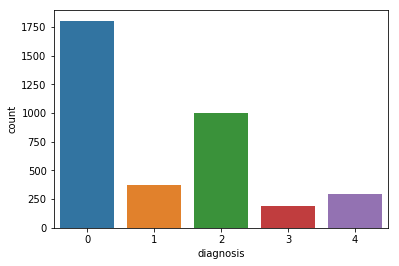

In [14]:
sn.countplot(x=train['diagnosis'])

In [40]:
def augment_and_show(image):
    # image = aug(image=image)['image']
    blurred = cv2.GaussianBlur(image, (0, 0), 10)
    image = cv2.addWeighted(image, 4, blurred, -4, 128)
    b = np.zeros(image.shape)
    cv2.circle(b, (int(image.shape[1] / 2), int(image.shape[0] / 2)), int(300 * 0.9), (1, 1, 1), -1, 8, 0)
    image = image * b + 128 * (1 - b)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    print(image.max())

In [41]:
im = cv2.imread(os.path.join('../../../../APTOS_2019_Blindness_Detection', 'train_images', train['id_code'][65] + '.png'))
scale = 300
def scaleRadius(img, scale):
    x = img[int(img.shape[0] / 2), :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)
im = scaleRadius(im, scale)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255.0


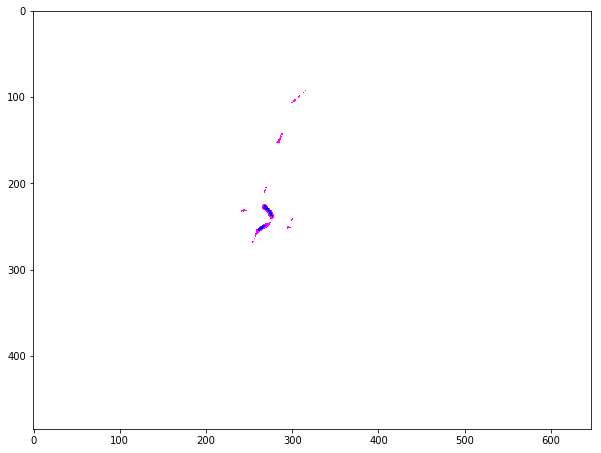

In [42]:
#aug = CLAHE(p=1)
augment_and_show(im)

In [107]:
print(train['diagnosis'][65])

0


In [91]:
import torch
torch.cuda.is_available()

True

In [ ]:
print()